<img height="120" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/cropped-logo-fcfm-die-1.png">

# Curso EL4203 Programación avanzada **Módulo 3**
### Por *Joaquin Zepeda Valero*, basado en los apuntes del curso "CC3001 Algoritmos y Estructuras de Datos" realizados por *Patricio Poblete*.

Los objetivos de este módulo son:

1. Distinguir y analizar diferentes métodos para búsqueda
y ordenamiento.
2. Seleccionar los métodos de búsqueda y ordenamiento
más adecuados para resolver un problema.
3. Resolver problemas de Ingeniería Eléctrica,
procesando información mediante búsquedas y
ordenamientos.
4. Implementar la solución de problemas en un lenguaje
de programación.
5. Aplicar los métodos de búsquedas y ordenamientos, por
ejemplo, en problemas de optimización y en análisis de
datos.

Contenidos:

* Búsqueda secuencial y binaria
* Árboles de búsqueda binaria y
balanceados.
* Hashing.
* Algoritmos de ordenación.
(quicksort, heapsort, mergesort,
etc.)
* Casos de estudio de búsqueda y
ordenamientos

[Referencias](https://colab.research.google.com/drive/1ej3ZGUCJu1pRP7xF0RqS4MbAOYCxvk_6?usp=sharing)

# Búsqueda secuencial y binaria

Existen distintos algoritmos de búsqueda los cuales varían en complejidad, eficiencia, etc. En general buscar datos siempre es algo que se necesita en cualquier aplicación. A continuación se presentan 2 tipos de búsquedas.

>   **Búsqueda secuencial:** corresponde a la búsqueda más intuitiva, se compara el elemento que se busca con cada elento del arreglo/lista enlazada (o en el caso de un árbol, en cada nodo), de esta manera se va revisando los elementos hasta encontrar el elemento buscado (se asume que todos los elementos están desordenados). En el mejor de los casos se encuentra el elemento con $1$ comparación y en el peor de los casos se encuentra con $n$ comparaciones siendo $n$ el largo del arreglo. La complejidad corresponde a $O(n)$.


>  **Búsqueda binaria:** asume que los elementos están ordenados. La Búsqueda Binaria, compara si el valor buscado está en la mitad superior o inferior. En la que esté, se vuelve a realizar esta búsqueda en el nuevo sub arreglo y así sucesivamente hasta encontrar el valor. La búsqueda con estos algoritmos tienen complejidad de $O(\log{n})$, siendo más eficiente que la búsqueda secuencial.



# Árboles de Busqueda Binaria

Este es un tipo especial de árbol binario, llamado *árbol de búsqueda binaria* (*ABB*), que **se caracteriza porque para cada nodo, sus hijos descendientes hacia la izquierda son menores que él, y los de la derecha son mayores**, además todos los elementos del subarbol izquierdo al deben ser menores a la raiz y todos los elementos del subarbol derecho deben ser mayores a la raiz. En resumen:
* El sub árbol izquierdo de un nodo X debe solo contener elementos con info menores a la info del nodo X.
* El sub árbol derecho de un nodo X debe solo contener elementos con info mayores a la info del nodo X.
* Los sub árboles izquierdo y derecho tienen que ser también ABB's.


<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/regla_abb.png">
</div>

A continuación se muestran 2 ejemplos, el árbol de la izquierda cumple con las condiciones de los Abb's, pero en el árbol de la derecha se puede observar que hay un elemento menor que la raiz en el sub árbol derecho, por lo que no es un Abb.

<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/abb_ej.png">
</div>

A continuación se muestra un ejemplo más complejo:

![ejemplo-ABB](https://github.com/ppoblete/AED/blob/master/ejemplo-ABB.png?raw=1)


Un nodo apunta hacia abajo a sus hijos (izquierdo y derecho), y se dice que es el *padre* de ellos. Yendo desde un nodo hacia abajo se encuentran sus *descendientes*, y hacia arriba se encuentran sus *ancestros*.


![Nodo-arbol-binario](https://github.com/ppoblete/AED/blob/master/Nodo-arbol-binario.png?raw=1)

Al dibujarlo con nodos circulares, normalmente las líneas no llevan flecha, porque se entiende que apuntan hacia abajo:

![Nodo-arbol-binario-circular](https://github.com/ppoblete/AED/blob/master/Nodo-arbol-binario-circular.png?raw=1)

 Todo esto permite que la busqueda dentro de estos árboles sea eficiente. Esta estructura de datos es muy famosa!, a continuación se presenta una posible implementación.

In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der


Si el nodo  *b*   es descendiente del nodo  *a* , se dice que la distancia entre  *a* y  *b*   es el número de pasos que hay que dar para ir de  *a*  a  *b*  . La máxima distancia entre la raíz y una hoja se llama la **altura del árbol**. En el ejemplo, la altura es  3.

La altura máxima de un abb con $n$ nodos internos es $n$, y la altura mínima es $\lceil \log_2{(n+1)} \rceil$. Esto último es una consecuencia de que un abb de altura $h$ puede tener a lo más $2^h$ nodos externos.


In [ ]:
class ABB:
    def __init__(self,raiz=None):
        self.raiz=raiz

### Recorridos de Árboles Binarios

Un árbol binario es una estructura esencialmente recursiva, y las principales formas de recorrer un árbol se definen también recursivamente.
Los tres tipos de recorridos más conocidos son:

* Preorden: Visitar la raíz, recorrer el subárbol izquierdo y recorrer el subárbol derecho

* Indorden: Recorrer el subárbol izquierdo, visitar la raíz y recorrer el subárbol derecho

* Postorden: Recorrer el subárbol izquierdo, recorrer el subárbol derecho y visitar la raíz

A continuación agregamos a la definición de la clase tres métodos que imprimen en contenido del árbol en estos recorridos:

In [ ]:
def pre(p):
    if p is not None:
        print(p.info,end=" ")
        pre(p.izq)
        pre(p.der)

def ino(p):
    if p is not None:
        ino(p.izq)
        print(p.info,end=" ")
        ino(p.der)

def post(p):
    if p is not None:
        post(p.izq)
        post(p.der)
        print(p.info,end=" ")
        
class ABB:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def preorden(self):
        print("Preorden:", end=" ")
        pre(self.raiz)
        print()
        
    def inorden(self):
        print("Inorden:", end=" ")
        ino(self.raiz)
        print()
        
    def postorden(self):
        print("Postorden:", end=" ")
        post(self.raiz)
        print()


Definamos un arbol para poder ejemplificar:

In [ ]:
a=ABB(
    Nodo(
        Nodo(
            Nodo(None,2,None),
            5,
            Nodo(
                None,
                7,
                None
            )
        ),
        10,
        Nodo(
            Nodo(
                None,
                12,
                None
            ),
            15,
            Nodo(
                None,
                20,
                None
            )
        )
       )
)

In [ ]:
a.preorden()
a.inorden()
a.postorden()

Preorden: 10 5 2 7 15 12 20 
Inorden: 2 5 7 10 12 15 20 
Postorden: 2 7 5 12 20 15 10 


Se puede notar que por los principios en los que se construyen los árboles de busqeda binarios al recorrer el árbol en inorden produce una lista ordenada (menor a mayor).

Utilizando una función auxiliar se puede observar la forma del árbol.

In [ ]:
!git clone https://github.com/joaquinzepeda/Programacion-Avanzada.git
%cd Programacion-Avanzada/funciones_auxiliares
from printTree import print2D

Cloning into 'Programacion-Avanzada'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 128 (delta 41), reused 101 (delta 17), pack-reused 0
Receiving objects: 100% (128/128), 1.45 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/Programacion-Avanzada/funciones_auxiliares


In [ ]:
print2D(a.raiz)


                    20

          15

                    12

10

                    7

          5

                    2


## Buscar elementos en Árboles de busqueda binarios

Buscar elementos en un ABB es $O(\log{n})$ (bastante eficiente debido a su estructura), si los elementos que hay en el sub árbol izquierdo son menores al valor del elemento que se busca, se salta a buscar en el sub árbol derecho sin buscar en el sub árbol izquierdo, lo mismo con el sub árbol derecho. Esto permite optimizar los tiempos de busqueda. En resumen se busca en el sub árbol izquierdo o derecho, pero no en ambos (y esto no solo se puede hacer con la raiz, se puede hacer con los sub árboles también).

A continuación se muestra un ejemplo de implementación de esta busqueda binaria:


In [ ]:
# función que busca un nodo que contenga de info el valor de x y retorna el nodo
def buscar(raiz, x):
    p = raiz #nodo actual
    while p is not None and x!=p.info:
        if x<p.info:  # si es menor que la raiz del nodo actual
            p = p.izq #avanzamos al sub árbol izquierdo
        else:
            p = p.der #avanzamos al sub árbol derecho
    return p

In [ ]:
encontrado = buscar(a.raiz,10)
print(encontrado.info)

10


In [ ]:
no_encontrado = buscar(a.raiz,100)
print(no_encontrado)

None


In [ ]:
def buscar_recursivo(raiz, x):
    p = raiz #nodo actual
    if p.info == x:
        return p
    elif x<p.info:  # si es menor que la raiz del nodo actual
        buscar_recursivo(p.izq,x) #buscamos en el subarbol izquierdo
    else:
        buscar_recursivo(p.der,x) #buscamos en el subarbol derecho

In [ ]:
encontrado_rec = buscar_recursivo(a.raiz,10)
print(encontrado_rec.info)
no_encontrado_rec = buscar(a.raiz,100)
print(no_encontrado_rec)

10
None


## Eliminar un elemento en un árbol de búsqueda binaria

Eliminar un nodo de un ABB es una operación un poco más complicada que las otras, esto se debe a que el elemento a eliminar puede no ser un nodo hoja, para eliminar primero es necesario determinar la ubicación del elemento en cuestión, luego se analizan los siguientes casos:

* **El nodo a eliminar no tiene hijos:** 
El elemento a eliminar corresponde al $nodo$ que contiene al $5$, simplemente se cambia el puntero del nodo padre que corresponde al nodo 4 y cambia el puntero para que de esta manera este apunte a None.  


```
Ejemplo de casos:
              7                              7
           /     \         delete(2)       /    \
          4        9       --------->     4      9 
         /  \    /  \                      \    /  \ 
        2    5  6    8                      5  6    8
```



* **El nodo a eliminar tiene 1 hijo:**
En este caso cambiamos el puntero del nodo padre al nodo por eliminar, para que apunte al único hijo del nodo a eliminar, luego de esto se elimina el nodo.
Esto se ejemplifica con la figura a continuación, se elimina el $nodo$ $5$ que tiene 1 solo hijo, se cambia el puntero del nodo padre que corresponde al nodo 4 y cambia el puntero para de esta manera este apunte al nodo 2.

```
              6                              6
           /     \         delete(4)      /    \
           2      9       --------->     2      9 
         /  \    /  \                   / \    /  \ 
        1    4  6   8                  1   3    6   8
            /
           3 
```



* **El nodo a eliminar tiene 2 hijos:** Existen 2 opciones:
    1. Seleccionar del subárbol izquierdo el nodo de mayor valor para que ocupe el lugar del nodo que se quiere eliminar.
    2. Seleccionar del subárbol derecho el nodo de menor valor para que ocupe el lugar del nodo que se quiere eliminar.

```
           4                                   4 
         /    \       opcion1:delete(9)      /  \
        2      9       --------->           2    7 
              /  \                              / \
             6    15                           6   15
            / \   / \                         /    / \
           5   7 10  16                      5    10  16

            4                                   4 
          /    \       opcion2:delete(9)      /   \
         2     9       --------->            2    10 
              /  \                               /  \
            6    15                             6    15
           / \   / \                           / \     \
          5  7  10  16                        5   7    16
```



In [ ]:
# el mayor valor se encuentra siempre en el sub árbol derecho
def maxValue(nodo):
    p = nodo
    while p.der is not None:
        p = p.der #avanzamos por la derecha hasta llegar al último valor
    return p
# el menor valor se encuentra siempre en el sub árbol izquierdo
def minValue(nodo):
    p = nodo
    while p.izq is not None:
        p = p.izq #avanzamos por la izquierda hasta llegar al último valor
    return p

def eliminar(raiz,x):
    """
    Elimina un nodo de un árbol de busqueda binario.
    """

    # Caso base
    if raiz is None:
        return None
    
    if x < raiz.info:
        raiz.izq = eliminar(raiz.izq,x)
    elif x>raiz.info:
        raiz.der = eliminar(raiz.der,x)
    else: #estamos posicionados en el elemento a eliminar, raiz.info == x
        
        # Caso 1 y 2: un solo hijo o ninguno
        if raiz.izq is None:
            p = raiz.der
            raiz = None #eliminamos el nodo en el que estamos posicionados
            return p # devolvemos el nodo hijo del eliminado
        
        elif raiz.der is None:
            p = raiz.izq
            raiz = None #eliminamos el nodo en el que estamos posicionados
            return p # devolvemos el nodo hijo del eliminado

        # Caso 3: raiz.izq != None & raiz.der != None (2 hijos)

        #--------- opción 1--------
        p = maxValue(raiz.izq) # utilizando el mayor valor del árbol izquierdo como reemplazo
        raiz.info = p.info # se reemplaza el nodo a eliminar
        raiz.izq = eliminar(raiz.izq,p.info) #se elimina el nodo que se reemplazó

        #--------- opción 2--------
        '''
        p = minValue(raiz.der)
        raiz.info = p.info # se reemplaza el nodo a eliminar
        raiz.der = eliminar(raiz.der,p.info) #se elimina el nodo que se reemplazó
        '''

    return raiz


In [ ]:
print('Caso 1')
eliminar(a.raiz,2)
print2D(a.raiz)
print('\n')

print('Caso 2')
eliminar(a.raiz,5)
print2D(a.raiz)
print('\n')
print('Caso 3')
eliminar(a.raiz,15)
print2D(a.raiz)
print('\n')

Caso 1

                    20

          15

                    12

10

                    7

          5


Caso 2

                    20

          15

                    12

10

          7


Caso 3

                    20

          12

10

          7




# Nano Desafío 10: Insertar nodo en árbol de busqueda binario

**Problema:** Complete la función $insertar(nodoraiz,info)$, el cual inserta un nuevo nodo en el árbol cumpliendo con las reglas de este. 
La función debe recibir por lo menos la información del nodo que se busca insertar y la raiz del abb.

**Ejemplos:** Sea el árbol $a$ a continuación, $insertar(a.raiz,info)$ debe agregar un nodo al árbol. 


```python
                    20

          15

                    12

10

                    7

          5

                    2
```
Si se inserta el 8 en el árbol, $insertar(a.raiz,8)$ tiene el siguiente resultado:
```python
                    20

          15

                    12

10

                              8

                    7

          5

                    2
```
**Nota:** Si desea la función insertar puede recibir otros argumentos, que reciba un nodoraiz y la info está pensado para realizar una solución recursiva.

In [ ]:
def insertar(nodoraiz,info):
        # Escribe tú respuesta del nano desafio 10 aquí, se puede cambiar los argumentos que recibe el método insertar
        pass
insertar(a.raiz,8)
print2D(a.raiz)


                    20

          12

10

          7



# Árboles binarios balanceados

Un árbol binario commpletamente balanceado se define como un árbol binario que cumple que:
1. **la diferencia de altura del subárbol izquierdo y derecho es menor o igual a 0**.
2. que el subárbol izquierdo es un árbol balanceado.
3. que el subárbol derecho es un árbol balanceado.

Esta condición que se impone sobre la diferencia de alturas afecta de forma directa la inserción de elementos en el árbol, pero también asegura que la búsqueda de un elemento sea lo más óptima posible.



## Árboles  AVL
Un árbol binario balanceado se define como un árbol binario que cumple que:
1. **la diferencia de altura del subárbol izquierdo y derecho es menor o igual a 1**.
2. que el subárbol izquierdo es un árbol balanceado.
3. que el subárbol derecho es un árbol balanceado.

Este tipo de árboles permite que los costos de búsqueda, inserción y eliminación son garantizadamente $O(\log{n})$ *en el peor caso*. Además la altura $h=O(\log{n})$


Condición de *altura balanceada*, que consiste en que sus subárboles hijos pueden tener alturas diferentes, pero la diferencia de sus alturas no puede ser mayor que 1.

![condicion-AVL](https://github.com/ppoblete/AED/blob/master/condicion-AVL.png?raw=1)

Más precisamente, si la función $h(T)$ es la altura del árbol $T$, para cada nodo interno sus subárboles hijos, digamos $A$ y $B$, deben cumplir que $|h(A)-h(B)|\le 1$.


A continuación se muestra un ejemplo en donde el árbol de la izquierda no corresponde a un AVL tree y el de la derecha si. Esto se debe a que uno de los nodos del árbol de la izquierda no cumple con la condición de la diferencias de alturas menor o igual a 1, este tiene una diferencia de alturas de 2.
<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/AVL.png">
</div>
Como podrán observar, estos árboles tienen los mismos elementos, pero no comparten la misma estructura, ¿Es posible transformar el árbol de la izquierda en un árbol AVL con alguna 

*   Elemento de lista
*   Elemento de lista

operación? La respuesta es si, a continuación se van a introducir las rotaciones, las cuales serán claves en la inserción de elementos en este tipo de árboles.

Nota:  inventado por Adelson-Velskii y Landis (AVL por sus iniciales).

In [ ]:
# Nodo interno
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    
    def altura(self):
        return 1+max(self.izq.altura(),self.der.altura())
    
    def es_AVL(self):
        return abs(self.izq.altura()-self.der.altura())<=1 \
                and self.izq.es_AVL() and self.der.es_AVL()
        
    def __str__(self):
        return "("+self.izq.__str__()+str(self.info)+self.der.__str__()+")"

#Nodo externo
class Nodoe:
    def __init__(self):
        pass

    def altura(self):
        return 0
    
    def es_AVL(self):
        return True
    
    def __str__(self):
        return"☐"

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
    
    def es_AVL(self):
        return self.raiz.es_AVL()
    
    def __str__(self):        
        return self.raiz.__str__()

In [ ]:
a1=Arbol(Nodoi(Nodoi(Nodoe(),1,Nodoe()),
            2,
            Nodoi(Nodoe(),3,Nodoi(Nodoe(),4,Nodoe()))))
print(a1)
print(a1.es_AVL())

((☐1☐)2(☐3(☐4☐)))
True


In [ ]:
a2=Arbol(Nodoi(Nodoi(Nodoe(),1,Nodoe()),
            2,
            Nodoi(Nodoe(),3,Nodoi(Nodoe(),4,Nodoi(Nodoe(),5,Nodoe())))))
print(a2)
print(a2.es_AVL())

((☐1☐)2(☐3(☐4(☐5☐))))
False


## Operaciones sobre un árbol AVL

### Búsqueda

Un árbol AVL es un ABB (con una condición adicional de balance), así que el algoritmo de búsqueda es el mismo.
El que la altura de todo árbol AVL sea logarítmica garantiza que las operaciones de búsqueda tomarán tiempo logarítmico en el peor caso.

### Inserción

Veremos a continuación que se puede insertar una nueva llave en un árbol AVL, preservando la condición AVL, en tiempo a lo más proporcional a la altura del árbol.

Supongamos que se inserta una nueva llave $x$ en un árbol AVL como el que muestra la siguiente figura:

![AVL1](https://github.com/ppoblete/AED/blob/master/AVL1.png?raw=1)

Supongamos que se inserta la llave $x$, siguiendo una trayectoria desde la raíz hasta la hoja respectiva, y que luego se retorna hacia arriba revisando en cada nodo de esa trayectoria si la condición AVL se sigue cumpliendo. Si en todos ellos la condición se cumple, no es necesario hacer nada más. Si no, supongamos qie el nodo marcado con asterisco ($d$) es el primero (de abajo hacia arriba) en donde la condición no se cumple.

Consideremos primero el caso en que a partir de $d$, los dos pasos siguientes hacia abajo fueron en la misma dirección (ambos hacia la izquierda, en la figura). Esto se llama una *inserción exterior*, y los dos pasos son de tipo "zig-zig" (o "zag-zag", en el caso simétrico en que los dos pasos fueron hacia la derecha).

Para que la condición AVL no se cumpla en $d$ y sí se cumpla en $b$, es necesario que los tres subárboles $A$, $C$ y $E$ sean todos de la misma altura, digamos $h$, y que la inserción de $x$ haga que la altura de $A$ crezca a $h+1$. Nótese que la altura del árbol, antes de la inserción, era $h+2$.

En este caso hacemos una rotación (simple) entre los nodos $b$y $d$, con el resultado que se muestra a la derecha. En el árbol resultante, los nodos $b$ y $d$ ahora cumplen la condición AVL (con diferencia cero) y, más aún, después de esta rotación, el árbol resultante tiene altura $h+2$. Por lo tanto, el árbol completo no ha cambiado de altura, lo cual implica que ningún nodo más arriba puede estar desbalanceado.

Por lo tanto, en el caso de una inserción exterior, basta con a lo más una rotación para restaurar la condición AVL en todo el árbol.

Consideremos ahora el caso de una *inserción interior*, en que los dos primeros pasos fueron en direcciones opuestas ("zig-zag" o el simétrico "zag-zig"):

![AVL2](https://github.com/ppoblete/AED/blob/master/AVL2.png?raw=1)

En este caso, es necesario entrar a examinar la estructura interna del subárbol $C$:

![AVL3](https://github.com/ppoblete/AED/blob/master/AVL3.png?raw=1)

En este caso, $x$ puede ir al subárbol $F$ o al subárbol $G$ indistintamente (¡pero no a ambos!).
Para restaurar la condición de balance AVL, necesitamos hacer _dos_ rotaciones: primero entre $c$ y $b$, y luego entre $c$ y $d$. El resultado neto es que el zig-zag $d-b-c$ se transforma en el subárbol perfectamente balanceado $b-c-d$.
El efecto combinado de estas dos rotaciones se llama una _rotación doble_.

Tal como ocurrió en el caso anterior, los tres nodos involucrados quedan cumpliendo la condición AVL, y el árbol resultante tiene altura $h+2$, la misma que tenía antes de la inserción. Por lo tanto, no puede haber nodos desbalanceados más arriba.

Esto, sumado a lo que vimos antes, demuestra que **a lo más una rotación (simple o doble) basta para recuperar el balance AVL después de una inserción**.

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        self.height=1+max(izq.height,der.height)

    def right_rotation(self):
        return(Nodoi(self.izq.izq,
                     self.izq.info,
                     Nodoi(self.izq.der,self.info,self.der)))
    
    def left_rotation(self):
        return(Nodoi(Nodoi(self.izq,self.info,self.der.izq),
                     self.der.info,
                     self.der.der))
        
    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            p=Nodoi(self.izq.insert(x),self.info,self.der)
            if p.izq.height>p.der.height+1:
                if x<p.izq.info: # inserción exterior
                    p=p.right_rotation()
                else: # inserción interior
                    p=Nodoi(p.izq.left_rotation(),p.info,p.der).right_rotation()           
        else: # x>self.info, simétrico del anterior
            p=Nodoi(self.izq,self.info,self.der.insert(x))
            if p.der.height>p.izq.height+1:
                if x>p.der.info: # inserción exterior
                    p=p.left_rotation()
                else: # inserción interior
                    p=Nodoi(p.izq,p.info,p.der.right_rotation()).left_rotation()         
        return p
        
    def __str__(self):
        return "("+self.izq.__str__()+str(self.info)+self.der.__str__()+")"

class Nodoe:
    def __init__(self):
        self.height=0
        self.info = None
        self.der = None
        self.izq = None
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())
    
    def __str__(self):
        return"☐"

class ArbolAVL:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def __str__(self):        
        return self.raiz.__str__()

### Ejemplo de Inserción en árbol AVL
A continuación se presenta un ejemplo de inserción en un árbol AVL, se insertan los siguientes elementos: 20-40-80-10-15. 

<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/insertion_example.png">
</div>

Notar que en la inserción del elemento 15, el 10 no puede volverse raíz de ese subárbol pues el 15 quedaría como hijo izquierdo y al ser mayor que el 10 no se cumpliría los principios de un árbol binario.


In [ ]:
a=ArbolAVL()
a.insert(20)
print(a)
a.insert(40)
print(a)
a.insert(80)
print(a)
a.insert(10)
print(a)
a.insert(15)
print(a)

(☐20☐)
(☐20(☐40☐))
((☐20☐)40(☐80☐))
(((☐10☐)20☐)40(☐80☐))
(((☐10☐)15(☐20☐))40(☐80☐))


In [ ]:
print2D(a.raiz)


                    None

          80

                    None

40

                              None

                    20

                              None

          15

                              None

                    10

                              None


### Eliminación

La eliminación en árbol AVL se realiza de manera análoga a un ABB, pero también **es necesario verificar que la condición de balance se mantenga una vez eliminado el elemento**. En caso que dicha condición se pierda, será necesario realizar una rotación simple o doble dependiendo del caso, pero es posible que se requiera más de una rotación para reestablecer el balance del árbol.

# Nano Desafío 11: delete AVL node implementation

**Problema:** Implemente la función $eliminarAVL()$, la cual elimine un nodo en un árbol AVL (notando que se debe verificar que la eliminación mantenga la condición de balance, en caso de no cumplirse está condición se debe hacer rotaciones).

**Ejemplo:** Se debe eliminar un nodo y en caso de que después de la eliminación no se cumpla la condición de balance, se debe realizar las rotaciones necesarias para balancear el nuevo árbol. A continuación se presentan ejemplos de eliminar:

```
      50                                  50    
     /   \                              /   \      
    40     60      eliminarAVL(10)    40    60   
   / \    /     - - - - - - - - ->   /  \       
 30   45 55                         30    45                  
 /                                  
10                                 
```


```
      50                                  50                          40
     /   \                              /   \                        /  \ 
    40     60      eliminarAVL(55)    40    60   Right Rotate()    30     50
   / \    /     - - - - - - - - ->   /  \       - - - - - - - ->  /       / \
 30   45 55                         30    45                    10      45  60
 /                                  /
10                                 10
```



In [ ]:
def eliminarAVL(raiz):
    pass

# Hashing
 
Es una técnica utilizada para almacenar y recuperar información lo más rápido posible. Se utiliza para realizar **búsquedas óptimas** y es útil para implementar tablas de símbolos. Hashing permite hacer búsquedas en tiempo esperado constante, en la medida que estemos dispuestos a no hacer uso del 100% de la memoria reservada para la estructura de datos. Se puede pensar en una especie de diccionario con una estructura eficiente para las operaciones de búsqueda, inserción y eliminación de elementos.
 
## ¿Por qué usar Hasing?
En la sección de árboles binarios de búsqueda balanceados se muestra que buscar, insertar y eliminar nodos en estos árboles es $O(\log{n})$ (tiempo logarítmico). En las aplicaciones de esto, se busca que las operaciones se puedan realizar en $O(1)$ lo cual es lo ideal, el hashing provee una forma de lograr esto. De todas maneras en el peor caso la complejidad del hashing sigue siendo $O(n)$, pero da $O(1)$ en promedio.


**Nota:** Hay mucho que hablar sobre este tema, por lo que solo se darán las nociones básicas sobre esto.


## Tablas de Hashing ADT

Una tabla de hash es una estructura de datos abstracta que representa los datos en forma de pares de llave-valor.

Una tabla de hash se puede pensar como un arreglo el cual está asociado a una **función de hash**, la función de hash permite determinar el indice del dato en forma de llave-valor.




## Funciones de hash


Una función de hashing es una función que transforma una llave $x$ en un valor $h(x) \in [0..m-1]$, para un valor dado de $m$, donde $m$ es mucho menor que el tamaño del universo al cual pertenece $x$. La función $h$ debe ser de tipo **pseudoaleatorio**, esto es, debe distribuir sus valores uniformemente sobre el rango $[0..m-1]$, pero debe ser reproducible.

Python tiene una función ``hash()`` que se vamos a utilizar en nuestros ejemplos. Esta función **recibe cualquier tipo de objetos** (Strings,int, float, etc) y **retorna un entero**.

In [ ]:
m=1000 # arreglo de mil datos
x="Programación avanzada"
print("h(x)=",hash(x)%m)

h(x)= 364


## Ejemplos para entender mejor


Sea una lista de pares  como la siguiente:

```python
tab =   [['enero 1990',10.0],
                     ...
            ['enero 2022', 100.0],
            ['febrero 2022', 120.0],
            ['marzo 2022', 101.0],
            ['abril 2022', 301.0],
            ['mayo 2022', 150.0],
            ['junio 2022', 50.0]]
```
En caso de buscar una fecha en específico, como por ejemplo ```'enero 2022'```, esto se puede realizar de forma lineal buscando elemento por elemento:
```python
for dato in precios:
    if dato[0] == 'enero 2022':
        print('Precio enero 2022:',dato[1])
```
¿Cuál es la complejidad de está búsqueda?
- La complejidad del algoritmo es de $O(n)$ utilizando las listas de Python y recorriendolas, pues se deben revisar todos los elementos (el largo).

Esto se puede mejorar a $O(1)$ utilizando un diccionario de Python, en donde de forma rápida se puede encontrar el valor del precio utilizando la fecha como llave:

```python
precios =   {'enero 1990':10.0,
                     ...
            'enero 2022': 100.0,
            'febrero 2022': 120.0,
            'marzo 2022': 101.0,
            'abril 2022': 301.0,
            'mayo 2022': 150.0,
            'junio 2022': 50.0}
```
Todo esto se puede realizar con una tabla de hash. A continuación se muestra otro ejemplo sobre esto:

<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/hashtable.png">
</div>


Existe un universo de posibles llaves, un arreglo que donde se van guardando los datos.La función de hashing permite determinar un indice que indica la posición del elemento. La salida de la **función de hash** corresponde a un **hash code** el cual corresponde usualmente a un entero de 32 bits, lo cual es muy grande para efectos prácticos, por lo que como estos indices son demasiado grandes (arreglo de $2^{32}$) lo que se realiza generalmente es **reducir el tamaño del arreglo que se utiliza en la hash table**.

Para realizar esto lo más común es utilizar la siguiente función de compresión: 

\begin{equation}
c = \text{h mod m}
\end{equation}

En donde *c* corresponde al *hash code*, *h* el hash code original y m el tamaño del arreglo que se desea utilizar (tambien podria pensarse como el número de espacios disponibles) y *mod* corresponde al módulo.


 A continuación se muestra un ejemplo donde se disponen de 100 espacios disponibles y se utiliza la función *hash* que trae Python por defecto.









In [ ]:
m=100 # arreglo de m datos
L=["ABC","5",5]
for x in L:
    print("h(x)=",hash(x)%m)

h(x)= 29
h(x)= 96
h(x)= 5


**Nota:** Dado un conjunto de $n$ llaves, suponiendo por el momento que $n\le m$, es posible que todas ellas sean mapeadas por la función $h$ a valores distintos. 

¿Que sucede si hay más de un valor que tenga el mismo *hash code*?
- Soluciones a este problema se muestran a continuación.


## Colisiones

Puede ocurrir y seguramente vamos a encontrarnos con llaves distintas $x, y$ tales que $h(x)=h(y)$. Esto se llama una _colisión_.

El que alguna colisión sea probable que exista viene de la *paradoja de los cumpleaños*, que veremos a continuación. Por otra parte, en promedio no puede haber muchas colisiones, porque para un valor de $k$ dado, el múmero promedio de llaves $x$ que tienen $h(x)=k$ es $n/m\le 1$, dado que suponemos que $h(x)$ distribuye las llaves uniformemente.

### La Paradoja de los Cumpleaños

Supongamos que en una sala hay $n$ personas. ¿Cuán grande debe ser $n$ para que sea probable que existan dos o más personas con cumpleaños el mismo día? Más precisamente, ¿para qué valor de $n$ la probabilidad de que haya alguna colisión de cumpleaños es $\ge 1/2$?

Resulta más fácil calcular la probabilidad opuesta $d_n$ de que _no_ haya colisión de cumpleaños. Esta probabilidad es igual a

$$
d_n = \left( \frac{365}{365} \right) \left( \frac{364}{365} \right) \cdots \left( \frac{365-n+1}{365} \right)
$$

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


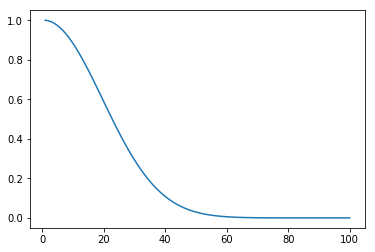

In [ ]:
n=range(1,101)
d=zeros(100)
d[0]=1
for k in range(1,100):
    d[k]=d[k-1]*(365-k)/365
plt.plot(n,d,label='$d_n$')

Para $n=23$ se tiene $d_n = 0.4927 < 1/2$, por lo tanto para $n=23$ la probabilidad de que exista alguna colisión es mayor que $1/2$.

Nótese que $23$ es relativamente pequeño comparado con $365$, lo cual indica, en general, que no es necesario que $n$ sea muy grande en relación a $m$ para que sea probable que exista alguna colisión. Por otra parte, el número total de colisiones no puede ser muy grande, y ambos hechos son los que debemos tener en consideración al aplicar la idea de hashing al diseño de diccionarios.

**Nota:** Con 57 personas la probabilidad es cercana al 99.6%.

### Métodos de resolución de colsiones


Dado que es inevitable que existan colisiones (aunque esperamos que sean pocas), debe haber alguna manera de resolver el problema que se produce cuando dos o más llaves son enviadas por la función de hashing al mismo casillero de la tabla.

Existen dos grandes familias de métodos:

* *Encadenamiento*: Utilizar punteros para enlazar los elementos que coinciden en su función de hashing.
 * Separate Chaining: En este tipo de tablas, la hash table corresponde a un **arreglo de punteros a una lista enlazada**, en caso de una colisión, se inserta el elemento en tiempo constante en la cabeza de su correspondiente lista enlazada. En caso de que el *hash code* de "ABC" sea igual al de un elemento "CDF" previamente guardado, se va insertando en la lista enlazada en donde se está guardando el puntero a estas listas. 

 
<div align="center">
<img src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/colisiones1.png">
</div>

* *Direccionamiento abierto (Open addressing)*: Utilizar una secuencia de funciones de hashing.
 * Linear probing: En caso de que una llave tenga el mismo *hash code* (o indice) que un elemento previamente guardado, se le asigna el siguiente espacio disponible en la tabla de hashing. 
    
    Más formalmente, la secuencia de funciones de hashing se define como

$$
\begin{align}
h_0(x) & = h(x)\\
h_{i+1}(x) & = (h_i(x)+1) \bmod m
\end{align}
$$


<div align="center">
<img src="https://github.com/ppoblete/AED/blob/master/LinearProbing.gif?raw=1">
</div>

 * Quadratic probing.
 * Double hashing (utilizar 2 funciones de hashing).



# Nano Desafío 12: Implementación de la inserción en una tabla de hashing con linear probing

**Problema:** Complete el método insert de la clase hashTable que se encuentra a continuación, este recibe un entero y no retorna nada.

**Test:** Para probar que funcione este código, inserte la siguiente secuencia de números

```
34, 59, 45, 27, 14, 22, 75, 25
```
El resultado deberia ser: 
```
	 Hash table
Hash Value: 0		25
Hash Value: 1		None
Hash Value: 2		22
Hash Value: 3		None
Hash Value: 4		34
Hash Value: 5		45
Hash Value: 6		14
Hash Value: 7		27
Hash Value: 8		75
Hash Value: 9		59
```

Es importante notar que es una buena secuencia pues se ingresan 3 valores con el mismo *hash code*.



In [ ]:
class hashTable:

    def __init__(self,size):
        self.size = size
        # inicia la tabla con ceros
        self.table = list(None for i in range(self.size))
        self.elementCount = 0
   
    # retorna el hashcode
    def hashFunction(self, element):
        return element % self.size
       
    # insertar elemento en la tabla de hash
    def insert(self, x):
        pass


In [ ]:
L = hashTable(10)
L.table

[None, None, None, None, None, None, None, None, None, None]

In [ ]:
llaves = [34, 59, 45, 27, 14, 22, 75, 25]
for x in llaves:
    L.insert(x)
print('\t Hash table')
for i in range(10):
    print("Hash Value: "+str(i) + "\t\t" + str(L.table[i]))

	 Hash table
Hash Value: 0		None
Hash Value: 1		None
Hash Value: 2		None
Hash Value: 3		None
Hash Value: 4		None
Hash Value: 5		None
Hash Value: 6		None
Hash Value: 7		None
Hash Value: 8		None
Hash Value: 9		None


# Algoritmos de ordenación

Son algoritmos que resuelven el problema de ordenar un conjunto de datos, lo cual tiene una gran importancia. A continuación se presentan algunos de los algoritmos de ordenación más famosos.

## Quicksort

Este método fue inventado por C.A.R. Hoare a comienzos de los '60s, y sigue siendo el método más eficiente para uso general.

Quicksort es un ejemplo clásico de la aplicación del principio de *dividir para reinar*. Su estructura es la siguiente:

* Primero se elige un elemento al azar, que se denomina el pivote.

* El arreglo a ordenar se reordena dejando a la izquierda a los elementos menores que el pivote, el pivote al medio, y a la derecha los elementos mayores que el pivote:

![particion](https://github.com/ppoblete/AED/blob/master/particion.gif?raw=1)

* Luego cada sub-arreglo se ordena recursivamente.

La recursividad termina, en principio, cuando se llega a sub-arreglos de tamaño cero o uno, los cuales trivialmente ya están ordenados. En la práctica veremos que es preferible detener la recursividad antes de eso, para no desperdiciar tiempo ordenando recursivamente arreglos pequeños, los cuales pueden ordenarse más eficientemente usando Ordenación por Inserción, por ejemplo.

In [ ]:
def quicksort(a):
    qsort(a,0,len(a)-1)

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)

def particion(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
    k=np.random.randint(i,j) # genera un número al azar k en rango i..j
    (a[i],a[k])=(a[k],a[i]) # mueve a[k] al extremo izquierdo
    # a[i] es el pivote
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    for t in range(s,j):
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(12)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

[0.21939313 0.41324672 0.99870279 0.15140399 0.33302848 0.92304672
 0.11206401 0.63418302 0.64504804 0.50401626 0.2064129  0.81939607]
Desordenado
[0.11206401 0.15140399 0.2064129  0.21939313 0.33302848 0.41324672
 0.50401626 0.63418302 0.64504804 0.81939607 0.92304672 0.99870279]
Ordenado


### Costo promedio de Quicksort

Si suponemos, como una primera aproximación, que el pivote siempre resulta ser la mediana del conjunto, entonces el costo de ordenar está dado (aproximadamente) por la ecuación de recurrencia

$$
T(n)=n+2T\left( \frac{n}{2} \right)
$$

Esto tiene solución $T(n) = n \log_2{n}$ y es, en realidad, el *mejor* caso de Quicksort.

Para analizar el tiempo promedio que demora la ordenación mediante Quicksort, observemos que el funcionamiento de Quicksort puede graficarse mediante un *árbol de partición*:

![arbol-particion](https://github.com/ppoblete/AED/blob/master/arbol-particion.gif?raw=1)

Por la forma en que se construye, es fácil ver que el árbol de partición es un *árbol de búsqueda binaria*, y como el pivote es escogido al azar, entonces la raíz de cada subárbol puede ser cualquiera de los elementos del conjunto en forma equiprobable. En consecuencia, los árboles de partición y los árboles de búsqueda binaria tienen exactamente la misma distribución.

En el proceso de partición, cada elemento de los subárboles ha sido comparado contra la raíz (el pivote). Al terminar el proceso, cada elemento ha sido comparado contra todos sus ancestros. Si sumamos todas estas comparaciones, el resultado total es igual al *largo de caminos internos*.

Usando todas estas correspondencias, tenemos que, usando los resultados ya conocidos para árboles, el número promedio de comparaciones que realiza Quicksort es de:

$$
T(n)=1.38 n\log_2{n}+\Theta(n)
$$

Por lo tanto, Quicksort, en el caso esperado, corre en un tiempo proporcional a la cota inferior.

### Peor caso de Quicksort

El peor caso de Quicksort se produce cuando el pivote resulta ser siempre el mínimo o el máximo del conjunto. En este caso la ecuación de recurrencia es

$$
T(n) = n - 1 + T(n-1)
$$
            
lo que tiene solución $T(n) = \Theta(n^2)$.

Si bien este peor caso es extremadamente improbable si el pivote se escoge al azar, algunas implementaciones de Quicksort toman como pivote al primer elemento del arreglo (suponiendo que, al venir el arreglo al azar, entonces el primer elemento es tan aleatorio como cualquier otro). El problema es que si el conjunto viene en realidad ordenado, entonces caemos justo en el peor caso cuadrático.

Lo anterior refuerza la importancia de que el pivote se escoja al azar. Esto no aumenta significativamente el costo total, porque el número total de elecciones de pivote es $\Theta(n)$.

### Mejoras a Quicksort

Quicksort puede ser optimizado de varias maneras, pero hay que ser muy cuidadoso con estas mejoras, porque es fácil que terminen empeorando el desempeño del algoritmo.

En primer lugar, es desaconsejable hacer cosas que aumenten la cantidad de trabajo que se hace dentro del "loop" de partición, porque este es el lugar en donde se concentra el costo $\Theta(n \log{n})$.

Algunas de las mejoras que han dado buen resultado son las siguientes:

#### Quicksort con "mediana de 3"

En esta variante, el pivote no se escoge como un elemento tomado al azar, sino que primero se extrae una muestra de 3 elementos, y entre ellos se escoge a la mediana de esa muestra como pivote.

Si la muestra se escoge tomando al primer elemento del arreglo, al del medio y al último, entonces lo que era el peor caso (arreglo ordenado) se transforma de inmediato en mejor caso.

De todas formas, es aconsejable que la muestra se escoja al azar, y en ese caso el análisis muestra que el costo esperado para ordenar n elementos es

$$
\frac{12}{7} n \ln{n}  \approx  1.19 n \log_2{n}
$$

Esta reducción en el costo se debe a que el pivote es ahora una mejor aproximación a la mediana. De hecho, si en lugar de escoger una muestra de tamaño 3, lo hiciéramos con tamaños como 7, 9, etc., se lograría una reducción aún mayor, acercándonos cada vez más al óptimo, pero con rendimientos rápidamente decrecientes.

## Heapsort

A partir de cualquier implementación de una cola de prioridad es posible obtener un algoritmo de ordenación. El esquema del algoritmo es:

* Comenzar con una cola de prioridad vacía.
* *Fase de construcción de la cola de prioridad*:
Traspasar todos los elementos del conjunto que se va a ordenar a la cola de prioridad, mediante $n$ inserciones.
* *Fase de ordenación*:
Sucesivamente extraer el máximo $n$ veces. Los elementos van apareciendo en orden decreciente y se van almacenando en el conjunto de salida.

Si aplicamos esta idea a las dos implementaciones simples de colas de prioridad, utilizando lista enlazada ordenada y lista enlazada desordenada, se obtienen los algoritmos de ordenación por Inserción y por Selección, respectivamente. Ambos son algoritmos cuadráticos, pero es posible que una mejor implementación lleve a un algoritmo más rápido. En el capítulo de *Pilas y Colas* vimos que una forma de obtener una implementación eficiente de colas de prioridad es utilizando una estructura de datos llamada *heap*.

### Implementación de Heapsort

Al utilizar un heap como implementación de una cola de prioridad para construir un algoritmo de ordenación, se obtiene un algoritmo llamado *Heapsort*, para el cual resulta que tanto la fase de construcción de la cola de prioridad, como la fase de ordenación, tienen ambas costo $\Theta(n \log{n})$, de modo que el algoritmo completo tiene ese mismo costo.

Por lo tanto, Heapsort tiene un orden de magnitud que coincide con la cota inferior, esto es, es óptimo incluso en el peor caso. Nótese que esto no era así para Quicksort, el cual era óptimo en promedio, pero no en el peor caso.

De acuerdo a la descripción de esta familia de algoritmos, daría la impresión de que en la fase de construcción del heap se requeriría un arreglo aparte para el heap, distinto del arreglo de entrada. De la misma manera, se requeriría un arreglo de salida aparte, distinto del heap, para recibir los elementos a medida que van siendo extraídos en la fase de ordenación.

En la práctica, esto no es necesario y basta con un sólo arreglo: todas las operaciones pueden efectuarse directamente sobre el arreglo de entrada.

En primer lugar, en cualquier momento de la ejecución del algoritmo, los elementos se encuentran particionados entre aquellos que están ya o aún formando parte del heap, y aquellos que se encuentran aún en el conjunto de entrada, o ya se encuentran en el conjunto de salida, según sea la fase. Como ningún elemento puede estar en más de un conjunto a la vez, es claro que, en todo momento, en total nunca se necesita más de $n$ casilleros de memoria, si la implementación se realiza bien.

En el caso de Heapsort, durante la fase de construcción del heap, podemos utilizar las celdas de la izquierda del arreglo para ir "armando" el heap. Las celdas necesarias para ello se las vamos "quitando" al conjunto de entrada, el cual va perdiendo elementos a medida que van "trepando" en el heap. Al concluir esta fase, todos los elementos han sido insertados, y el arreglo completo es un solo gran heap.

![heap-cons](https://github.com/ppoblete/AED/blob/master/heap-cons.gif?raw=1)

En la fase de ordenación, se van extrayendo elementos del heap, con lo cual éste se contrae de tamaño y deja espacio libre al final, el cual puede ser justamente ocupado para ir almacenando los elementos a medida que van saliendo del heap (recordemos que van apareciendo en orden decreciente).

![heap-ord](https://github.com/ppoblete/AED/blob/master/heap-ord.gif?raw=1)

### Optimización de la fase de construcción del heap

Como se ha señalado anteriormente, tanto la fase de construcción del heap como la de ordenación demoran tiempo $\Theta(n \log{n})$. Esto es el mínimo posible (en orden de magnitud), de modo que no es posible mejorarlo significativamente.

Sin embargo, es posible modificar la implementación de la fase de construcción del heap para que sea mucho más eficiente.

La idea es invertir el orden de las "mitades" del arreglo, haciendo que el "input" esté a la izquierda y el "heap" a la derecha.

En realidad, si el "heap" está a la derecha, entonces no es realmente un heap, porque no es un árbol completo (le falta la parte superior), pero sólo nos interesa que en ese sector del arreglo se cumplan las relaciones de orden entre cada padre y sus hijos. En cada iteración, se toma el último elemento del "input" y se le "hunde" dentro del heap de acuerdo a su nivel de prioridad.

![heap-cons2](https://github.com/ppoblete/AED/blob/master/heap-cons2.gif?raw=1)

Al concluir, se llega igualmente a un heap completo, pero el proceso es significativamente más rápido.

La razón es que, al ser "hundido", un elemento paga un costo proporcional a su distancia al fondo del árbol. Dada las características de un árbol, la gran mayoría de los elementos están al fondo o muy cerca de él, por lo cual pagan un costo muy bajo. En un análisis aproximado, la mitad de los elementos pagan 0 (ya están al fondo), la cuarta parte paga 1, la octava parte paga 2, etc. Sumando todo esto, tenemos que el costo total está acotado por

$$
n \sum_{i\ge 0}{\frac{i}{2^{i+1}}}
$$

lo cual es igual a $n$.

En la práctica, al comenzar a construir el heap "de abajo hacia arriba", no hace falta examinar los elementos que no tienen hijos, porque ellos cumplen automáticamente la relación de orden. Por lo tanto, basta comenzar a examinar los elementos desde el casillero $\lfloor \frac{n}{2} \rfloor-1$ hacia atrás.

In [ ]:
def hundir(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]>a[k]: # el hijo derecho existe y es mayor
            k+=1
        if a[j]>=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos

def heapsort(a):
    n=len(a)
    # Fase de construcción del heap
    for i in range(n//2-1,-1,-1):
        hundir(a,i,n)
    # Fase de ordenación
    for i in range(n-1,-1,-1):
        (a[0],a[i])=(a[i],a[0])
        hundir(a,0,i)

In [ ]:
import numpy as np
a = np.random.random(6)
print(a)
heapsort(a)
print(a)

[0.58123276 0.57772293 0.22690173 0.49691097 0.78430617 0.16308228]
[0.16308228 0.22690173 0.49691097 0.57772293 0.58123276 0.78430617]


## Mergesort

Si tenemos dos arreglos que ya están ordenados, podemos mezclarlos para formar un solo arreglo ordenado en tiempo proporcional a la suma de los tamaños de los dos arreglos.

Esto se hace leyendo el primer elemento de cada arreglo, copiando hacia un arreglod de salida al menor de los dos, y avanzando al siguiente elemento en el arreglo respectivo. Cuando uno de los dos arreglos se termina, todos los elementos restantes del otro se copian hacia la salida. Este proceso se denomina "mezcla", o bien "merge", por su nombre en inglés.

Como cada elemento se copia sólo una vez, y con cada comparación se copia algún elemento, es evidente que el costo de mezclar los dos archivos es lineal.

Si bien es posible realizar el proceso de mezcla de dos arreglos contiguos *in situ*, el algoritmo es muy complicado y no resulta práctico. Por esta razón, el proceso se implementa generalmente copiando desde dos arreglos de entrada a uno de salida.

In [ ]:
def merge(a,b):
    i=0
    j=0
    while i<len(a) or j<len(b):
        if j>=len(b) or (i<len(a) and a[i]<=b[j]):
            yield a[i]
            i=i+1
        else:
            yield b[j]
            j=j+1

In [ ]:
a = [24,43,55,57,88,91]
b = [10,17,40,61,70,76]
print(a)
print(b)
c=[x for x in merge(a,b)]
print(c)

[24, 43, 55, 57, 88, 91]
[10, 17, 40, 61, 70, 76]
[10, 17, 24, 40, 43, 55, 57, 61, 70, 76, 88, 91]


Usando esta idea en forma reiterada, es posible ordenar un conjunto. Una forma de ver esto es recursivamente, de manera "*top-down*", usando "dividir para reinar".

In [ ]:
def mergesort(a):
    n=len(a)
    if n>1:    
        mergesort(a[0:n//2])
        mergesort(a[n//2:n])
        a[0:n]=[x for x in merge(a[0:n//2],a[n//2:n])]

In [ ]:
import numpy as np
a = np.random.random(6)
print(a)
mergesort(a)
print(a)

[0.98208828 0.87903465 0.49512148 0.9665445  0.75927717 0.20751891]
[0.20751891 0.49512148 0.75927717 0.87903465 0.9665445  0.98208828]


El tiempo total está dado aproximadamente por la ecuación de recurrencia

$$
T(n) = 2 T\left(\frac{n}{2}\right) + n
$$

la cual tiene solución $\Theta(n \log{n})$, de modo que el algoritmo resulta ser óptimo.

Esto mismo se puede implementar en forma no recursiva, "*bottom-up*", agrupando los elementos de a dos y mezclándolos para formar pares ordenados. Luego mezclamos pares para formar cuádruplas ordenadas, y así sucesivamente hasta mezclar las últimas dos mitades y formar el conjunto completo ordenado. Como cada "ronda" tiene costo lineal y se realizan $\log{n}$ rondas, el costo total es $\Theta(n \log{n})$.

# Nano desafío 13: CheckDuplicates

**Problema:** Dado un arreglo de $n$ números que contienen elementos repetidos, optimice la función ```checkDuplicates``` la cual checkea si un arreglo tiene elementos repetidos o no. Esta función tiene como restricción que no se puede utilizar espacio adicional (es decir no se pueden utilizar variables temporales o auxiliares).
 
La complejidad de la función actual tiene una complejidad de $O(n^2)$, **explique por qué está función tiene  esta complejidad y explique la complejidad de la función optimizada** (la cual debe ser menor a $O(n^2)$).
 
**Hint:** estamos en el capítulo de ordenación.

In [ ]:
def checkDuplicates(L):
    for i in range(len(L)):
        for j in range(i+1,len(L)):
            if L[i]==L[j]:
                print(f'Existe un duplicado en las posiciones i:{i}, j:{j}')
                return
    print('No existen duplicados :D')

In [ ]:
import numpy as np
L = np.random.randint(1000000, size=10000)
checkDuplicates(L)

Existe un duplicado en las posiciones i:113, j:5631
